Monte Carlo simulation performs risk analysis by building models of possible results by substituting a range of values- called a probability distribution - for any factor that has inherent uncertainty.

# Predicting Gross Profit

We need: Expected revenue & Expected COGS (Cost of Goods SOld) to predict the Gross Profit.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# the expected revenue for this year =$170 million with a std=$20million
rev_m = 170
rev_stdev = 20
iterations = 1000

In [3]:
#generate random numbers which is normally distributed with the data created above
rev = np.random.normal(rev_m, rev_stdev, iterations)
rev

array([192.5351981 , 169.68992009, 149.75720789, 175.18076273,
       181.24609569, 178.94397536, 152.57890324, 155.80697963,
       174.64908445, 157.54229447, 193.47867367, 124.49989691,
       176.75057107, 205.4236638 , 153.67443744, 186.34078564,
       162.72499458, 166.44539095, 161.7008694 , 208.29045807,
       166.9751291 , 162.19809512, 161.55496775, 207.4849834 ,
       179.57429123, 154.50463693, 178.89301553, 147.35607086,
       192.77806557, 225.22882505, 166.9453302 , 166.00138885,
       225.36924823, 168.10036447, 181.56842448, 175.12653942,
       141.26964068, 187.29692733, 150.60566807, 181.61845472,
       149.51617894, 171.29592879, 187.57731059, 153.51963092,
       162.8272498 , 132.44315111, 184.34492496, 146.35484384,
       175.11368089, 176.99956707, 179.01428267, 149.22043827,
       181.75555035, 160.31123652, 175.74220336, 154.46469904,
       135.86307037, 212.42145044, 191.35143038, 213.18524784,
       156.09528922, 187.89769727, 157.83387407, 140.48

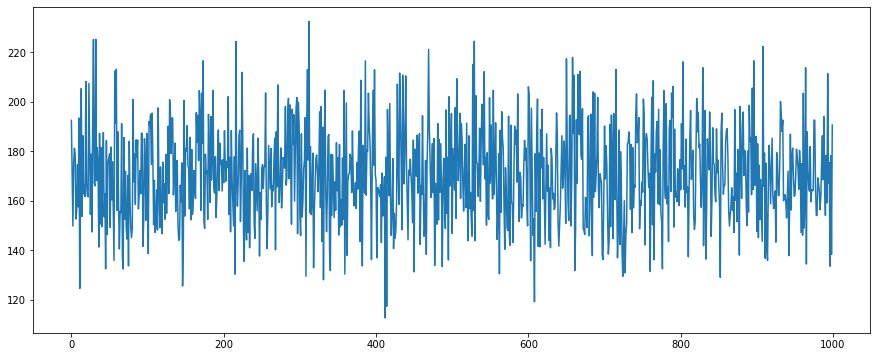

In [4]:
plt.figure(figsize=(15,6))
plt.plot(rev)
plt.show()

The graph shows that the data generated has a mean around 170. The 1 sigma range, 150 (170-20) to 190 (170+20) is also shown in the graph. This is the graph of the distribution of expected revenues.

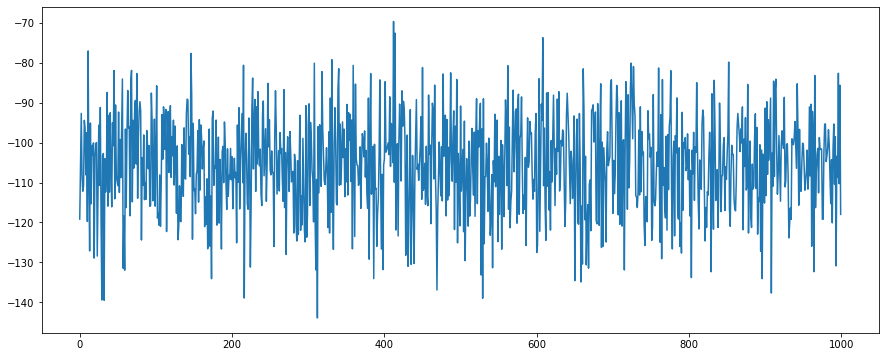

In [5]:
#to create the distribution of COGS. We know in this company COGS are around 60% of the revenues with a std of 10%.
COGS = -(rev*np.random.normal(0.6,0.1))

plt.figure(figsize=(15,6))
plt.plot(COGS)
plt.show()

In [6]:
COGS.mean()

-105.51736794777173

In [7]:
COGS.std()

12.11148427491348

In [8]:
#calculate gross profit
gross_profit = rev + COGS
gross_profit

array([73.38065035, 64.67366391, 57.07673931, 66.76638051, 69.07805173,
       68.20064808, 58.15216781, 59.38247971, 66.56374277, 60.04385764,
       73.74023577, 47.45045838, 67.3646792 , 78.29281189, 58.56970711,
       71.01978325, 62.01913233, 63.4370814 , 61.62880905, 79.38542887,
       63.63897971, 61.81831594, 61.57320177, 79.07843952, 68.44087942,
       58.88611979, 68.18122583, 56.16159756, 73.47321406, 85.84112319,
       63.6276225 , 63.26785955, 85.89464247, 64.06783897, 69.20090042,
       66.74571446, 53.84188559, 71.38419609, 57.40011166, 69.21996837,
       56.9848763 , 65.2857596 , 71.49105814, 58.51070593, 62.05810471,
       50.4778589 , 70.25910387, 55.78000141, 66.74081371, 67.45957867,
       68.22744419, 56.87216111, 69.27221942, 61.09918036, 66.98036153,
       58.87089832, 51.78128758, 80.95986778, 72.92948274, 81.25097273,
       59.49236271, 71.61316663, 60.15498693, 53.5446033 , 59.35410379,
       59.1249631 , 72.87310566, 52.11496168, 50.45118828, 70.72

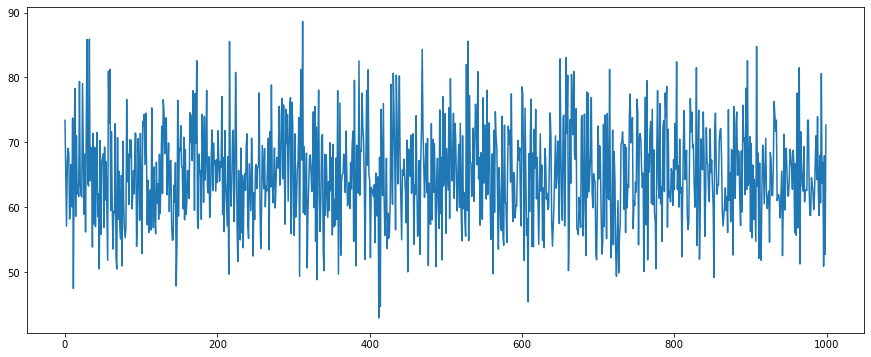

In [10]:
plt.figure(figsize=(15,6))
plt.plot(gross_profit)
plt.show()

In [11]:
gross_profit.mean()

64.98227074912054

In [12]:
gross_profit.std()

7.458788686955338

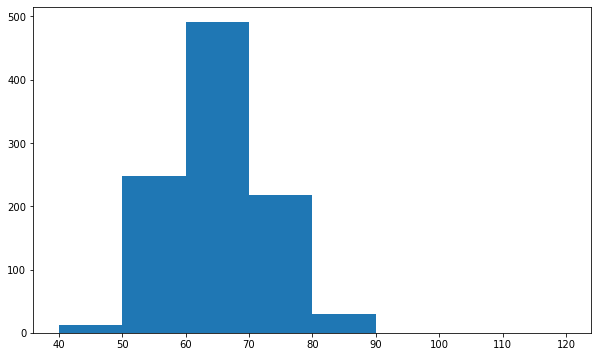

In [13]:
plt.figure(figsize=(10,6))
plt.hist(gross_profit,bins=[40,50,60,70,80,90,100,110,120])
plt.show()

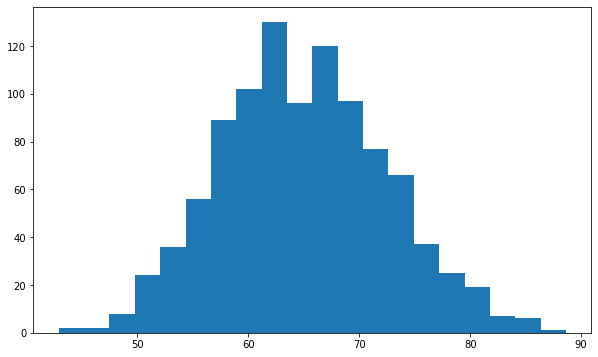

In [18]:
plt.figure(figsize=(10,6))
plt.hist(gross_profit,bins=20)
plt.show()

# Forcasting stock prices
price today = price yesterday * $e^r$

r = log return of share price between yesterday and today

To calculate r, we can use Brownian motion to model r

* Drift: the direction rates of return have been headed in the past. = ln (Current Price / Previous Price).
    
    Calculate average, standard deviation and variance of daily returns in the historical period. Drift = ($\mu - \frac{1}{2} \sigma ^2$)
* Volatility: random variable = $\sigma * Z(Rand(0,1))$

* Price Today = Price Yesterday * $e^{(\mu - \frac{1}{2} \sigma ^2)+\sigma Z[Rand(0,1)]}$

* Z is the number corresponds to the distance between the mean and the events, expressed as the number of standard deviations

In [19]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

In [20]:
ticker ='PG'
data=pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source ='yahoo', start ='2007-1-1')['Adj Close']

In all our analyses, we used estimations for either simple or logarithmic rates of return. <br/>
The formula for simple returns is

$$
\frac{P_t - P_{t-1}}{P_{t-1}}
,$$

while the formula for log returns is

$$
ln( \frac{P_t}{P_{t-1}} )
.$$

in Python, we could write the first formula as  <br/ >

*(data / data.shift(1)) - 1,*

and the second one as

*np.log(data / data.shift(1)).*

Instead of coding it this way, some professionals prefer using **Pandas.DataFrame.pct_change()** method, as it computes simple returns directly.

You can calculate the same formula for log returns with the help of the .pct_change() method. Just be careful with the way you apply the formula! Mathematically, it will look like this:

$$
ln(\frac{P_t}{P_{t-1}} ) = ln( \frac{P_t - P_{t-1}}{P_{t-1}} + \frac{P_{t-1}}{P_{t-1}}) = ln(\ simple.returns + 1)
.$$



In [26]:
'''pandas.pct_change() obtains simple returns from a provided dataset. 
And used the second way to calculate log returns'''
log_returns = np.log(1+data.pct_change())

In [22]:
log_returns.tail()

,PG
Date,
2022-11-18,0.011996
2022-11-21,0.012616
2022-11-22,0.008552
2022-11-23,0.005684
2022-11-25,0.000341


<AxesSubplot:xlabel='Date'>

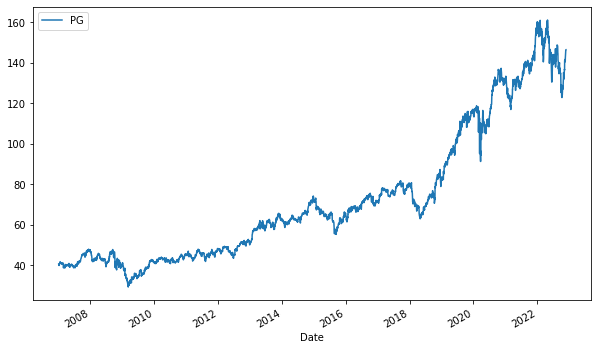

In [23]:
data.plot(figsize=(10,6))

<AxesSubplot:xlabel='Date'>

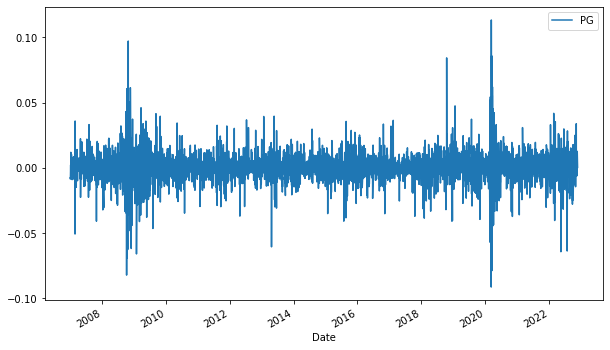

In [24]:
log_returns.plot(figsize=(10,6))

In [25]:
u=log_returns.mean()
u

PG    0.000321
dtype: float64

In [27]:
var = log_returns.var()
var

PG    0.000141
dtype: float64

In [28]:
drift = u - (0.5*var)
drift

PG    0.00025
dtype: float64

In [29]:
stdev = log_returns.std()
stdev

PG    0.011878
dtype: float64

In [37]:
#the first method to change panda series into array
np.array(drift)

array([0.00025014])

In [39]:
#the second method to change panda series into array
drift.values

array([0.00025014])

In [40]:
#get a random number to represent standard deviation that an event has 95% chance of occurring
norm.ppf(0.95)

1.6448536269514722

In [41]:
#create 10 by 2 matrix of random numbers in an array
x=np.random.rand(10,2)
x

array([[0.67185409, 0.35430113],
       [0.55063062, 0.6193479 ],
       [0.34650468, 0.547494  ],
       [0.30062161, 0.29765099],
       [0.06971052, 0.436622  ],
       [0.50298813, 0.58639269],
       [0.24659613, 0.36404271],
       [0.4924685 , 0.39315322],
       [0.42857689, 0.6850217 ],
       [0.57202481, 0.72045783]])

In [42]:
'''include the previous random element x within the ppf distribution to obtain the distance 
from the mean corresponding to each of these randomly generated probabilities.'''
norm.ppf(x)

array([[ 0.44503867, -0.37373397],
       [ 0.12725478,  0.3037686 ],
       [-0.39477445,  0.11933241],
       [-0.52261353, -0.53116854],
       [-1.47795042, -0.15953929],
       [ 0.00749019,  0.21827529],
       [-0.68524036, -0.34767347],
       [-0.01887979, -0.27111   ],
       [-0.17999845,  0.48178794],
       [ 0.18153154,  0.5842021 ]])

In [43]:
Z=norm.ppf(np.random.rand(10,2))
Z

array([[ 0.37263269, -0.1475526 ],
       [ 0.18238486, -0.11153966],
       [ 0.66437067, -0.11666808],
       [ 2.8802813 , -1.42880758],
       [ 1.4316794 ,  2.96710777],
       [-1.15025124, -0.38621233],
       [ 0.65824628,  2.02270308],
       [ 0.05650289, -0.43355727],
       [-2.01066563, -1.50553379],
       [-0.54920232, -1.47037522]])

In [44]:
t_intervals = 1000
iterations = 10

In [45]:
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals,iterations)))
daily_returns

array([[1.00367613, 1.02390004, 0.99469055, ..., 1.00951097, 0.99595168,
        0.9959049 ],
       [0.9833117 , 1.01273541, 0.99398679, ..., 0.99846715, 1.01830389,
        1.02955467],
       [1.00340159, 0.9962728 , 0.99755064, ..., 1.00642681, 0.99961007,
        0.98114435],
       ...,
       [0.98429232, 1.01057421, 1.01086479, ..., 0.99163244, 0.98976634,
        0.9917115 ],
       [0.98721318, 0.99571744, 1.00328485, ..., 1.00530365, 1.01833917,
        0.99845887],
       [0.98155052, 0.9930117 , 0.99831193, ..., 0.98394303, 1.00687662,
        0.98335671]])

To create a price list

$S_{t} = S_{0}* dailyreturn_{t}$

$S_{t+1} = S_{t}* dailyreturn_{t+1}$

...

$S_{t+999} = S_{t+998}* dailyreturn_{t+999}$

In [49]:
#the stock price today is the starting point. And we will predict the stock price in the future
S0 = data.iloc[-1]
S0

PG    146.5
Name: 2022-11-25 00:00:00, dtype: float64

In [50]:
#create an array with 0s, and the shape is the same as daily_returns
price_list = np.zeros_like(daily_returns)
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [51]:
price_list[0] = S0
price_list

array([[146.5, 146.5, 146.5, ..., 146.5, 146.5, 146.5],
       [  0. ,   0. ,   0. , ...,   0. ,   0. ,   0. ],
       [  0. ,   0. ,   0. , ...,   0. ,   0. ,   0. ],
       ...,
       [  0. ,   0. ,   0. , ...,   0. ,   0. ,   0. ],
       [  0. ,   0. ,   0. , ...,   0. ,   0. ,   0. ],
       [  0. ,   0. ,   0. , ...,   0. ,   0. ,   0. ]])

In [52]:
#use a loop to replace the 0s with the predicted stock price
for t in range(1,t_intervals):
    price_list[t] = price_list[t-1]*daily_returns[t]

In [53]:
price_list

array([[146.5       , 146.5       , 146.5       , ..., 146.5       ,
        146.5       , 146.5       ],
       [144.05516396, 148.36573754, 145.61906433, ..., 146.27543743,
        149.1815205 , 150.82975853],
       [144.54518014, 147.81274815, 145.26239031, ..., 147.21552168,
        149.12335086, 147.98576472],
       ...,
       [322.2865884 , 210.78863569, 114.2997135 , ..., 150.05658631,
        175.03167068, 156.07134527],
       [318.16556834, 209.88592051, 114.67517135, ..., 150.85243453,
        178.24160633, 155.83081979],
       [312.29557901, 208.41917571, 114.48159189, ..., 148.4302011 ,
        179.46730565, 153.23728205]])

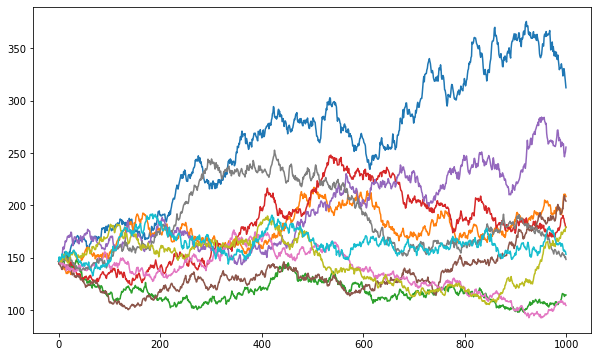

In [54]:
plt.figure(figsize=(10,6))
plt.plot(price_list)

# Derivative
A derivative is a financial instrument, whose price is derived based on the development of one or more underlying assets.

4 main types of derivatives:
1. Forwards: Two parties agree that one party will sell to the other an underlying asset at a future point of time
2. Futures: highly standardized forward contracts
3. Swaps: two parties agree to exchange cash flows based on an underlying assets. The underlying asstest include: interest rate, stock price, bond price, commodity
4. Options: enables its owner to buy or sell an underlying asset at a given price

## Black Scholes formula - tool for derivative pricing
* Assumptions:
    * Efficient markets
    * No Transaction costs
    * No dividend payments
    * Known volatility and risk-free rate
* Black Scholes Formula for a Call option

$C(S,t) = N(d_{1})S - N(d_{2})Ke^{-r(T-t)}$

d1 = $\frac{1}{s\sqrt{(T-t)}} [ln(\frac{S}{K})+(r+\frac{s^2}{2})(T-t)]$

d2 = $d1-s\sqrt{T-t}$ 

s = Current Stock price

K = option strike price

t = time until option expires

r = risk - free interest rate

s = sample standard deviation

N = standard normal distribution

e = exponential term

C = call premium

d1: shows how much can we expect if the option is exercised

d2: shows the amount we must pay when exercising the option

In [55]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
from scipy.stats import norm

In [56]:
def d1(S,K,r,stdev,T):
    return (np.log(S/K)+(r+stdev **2/2)*T)/(stdev*np.sqrt(T))

def d2(S,K,r,stdev,T):
    return (np.log(S/K)+(r-stdev**2/2)*T)/(stdev*np.sqrt(T))

In [59]:
'''cumulative distribution function shows how the data accumulates in time. 
norm.cdf() shows what portion of data is below the number given in a normal distribution. 
The result shows 50% data is below 0'''
norm.cdf(0)

0.5

In [60]:
norm.cdf(0.25)

0.5987063256829237

In [61]:
norm.cdf(0.75)

0.7733726476231317

In [62]:
norm.cdf(9)

1.0

In [63]:
def BSM(S,K,r,stdev,T):
    return (S*norm.cdf(d1(S,K,r,stdev,T))) - (K*np.exp(-r*T)*norm.cdf(d2(S,K,r,stdev,T)))

In [64]:
ticker = 'PG'
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start = '2007-1-1', end='2017-3-21')['Adj Close']

In [65]:
S = data.iloc[-1]
S

PG    77.781395
Name: 2017-03-21 00:00:00, dtype: float64

In [66]:
log_returns = np.log(1+data.pct_change())

In [67]:
stdev = log_returns.std()*250**0.5
stdev

PG    0.17655
dtype: float64

In [68]:
r = 0.025
K = 110.0
T = 1

In [69]:
d1(S,K,r,stdev,T)

PG   -1.733179
dtype: float64

In [70]:
d2(S,K,r,stdev,T)

PG   -1.909729
dtype: float64

In [71]:
BSM(S,K,r,stdev,T)

PG    0.21744
Name: 2017-03-21 00:00:00, dtype: float64

Interpretation: The call option price is 0.22

## Euler Discretization

In [73]:
ticker = 'PG'
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start = '2007-1-1', end='2017-3-21')['Adj Close']

In [74]:
log_returns = np.log(1+data.pct_change())

$S_{t} = S_{t-1}*e^{((r-\frac{1}{2}*stdev^2)*\delta _{t} +stdev*\sqrt{\delta _{t}}*Z_{t}}$

In [75]:
r = 0.025

In [81]:
stdev = log_returns.std()*250**0.5
stdev

PG    0.17655
dtype: float64

In [82]:
type(stdev)

pandas.core.series.Series

In [83]:
#change the stdev type to array
stdev = stdev.values
stdev

array([0.17655019])

In [84]:
T = 1.0
t_intervals = 250
delta_t = T/t_intervals

iterations = 10000

In [85]:
Z = np.random.standard_normal((t_intervals +1,iterations))
S = np.zeros_like(Z)
S0 = data.iloc[-1]
S[0] = S0

In [86]:
for t in range(1, t_intervals +1):
    S[t] = S[t-1]*np.exp((r-0.5*stdev**2)*delta_t+stdev*delta_t**0.5*Z[t])

In [87]:
S

array([[ 77.78136444,  77.78136444,  77.78136444, ...,  77.78136444,
         77.78136444,  77.78136444],
       [ 78.34534784,  78.32091298,  76.8178176 , ...,  78.08735546,
         77.40947697,  77.47819627],
       [ 79.59495454,  78.51468755,  76.73706609, ...,  77.88217212,
         77.14882062,  77.84573629],
       ...,
       [ 69.46469635,  54.84265096,  89.04406394, ..., 103.4961998 ,
         65.79279022,  91.73328426],
       [ 68.88537442,  55.3501459 ,  87.91266252, ...,  99.67899058,
         65.31689103,  92.26061576],
       [ 68.00795601,  55.62241669,  86.88861178, ...,  99.1340856 ,
         65.98776997,  91.51709014]])

In [88]:
S.shape

(251, 10000)

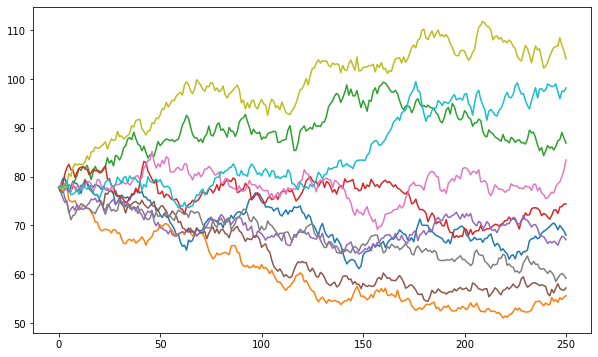

In [89]:
plt.figure(figsize=(10,6))
plt.plot(S[:,:10])

Call option:

Buy if: S - K >0

Don't buy if: S-K < 0

In [90]:
#numpy.maximum() will create an array that contains either 0s or the numbers equal to the differences
p = np.maximum(S[-1] - 110, 0)

In [91]:
p.shape

(10000,)

In [92]:
p

array([0., 0., 0., ..., 0., 0., 0.])

C = $\frac{e^{-rT}*\Sigma p_{i}}{iterations}$

In [93]:
C = np.exp(-r*T)*np.sum(p)/iterations
C

0.22161049128374594

interpretation: The call option price is 0.22.